# Using the Superdense Coding Circuit Generator

In [3]:
%run SDC.ipynb

In order to generate a circuit instance of the Superdense Coding protocol, one must first create an *SDC* class instance. This class takes in two parameters:
1. **msg** - The classical message to be exchanged
2. **barriers** - A boolean deciding if barriers should be included (the default value is True, and unless there is a specific reason to exclude, it is highly recommended that they remain)

In [4]:
SDC_instance = SDC("1011", True)

From here, one must simply call the function *gen_circuit()* on their SDC instance to retrieve a circuit describing the Superdense Coding protocol with the given message.

In [5]:
circuit = SDC_instance.gen_circuit()

We can check the circuit like so:

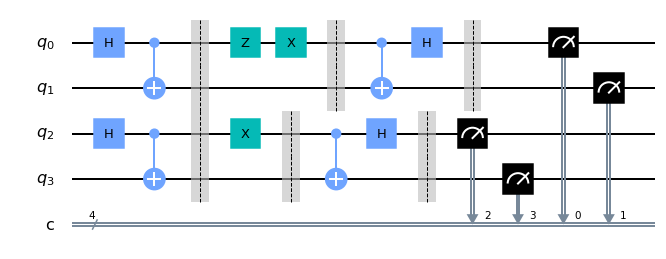

In [6]:
circuit.draw('mpl')

To check if this circuit behaves as intended, we need only produce the histogram generated by a simulated quantum computer.

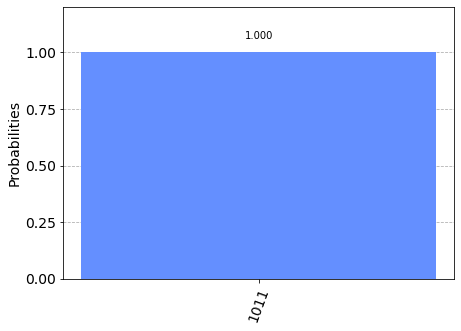

In [7]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
plot_histogram(execute(circuit, backend, shots=1024).result().get_counts(circuit))

As you can see, when running through simulations, this circuit performs as expected 100% of the time.

# Implementation Details

Below are some justifications for my implementation in expansion from the base Superdense Coding protocol that can be found on Qiskit textbook.

### Bell Pairs

In the base case of SDC, when sending one qubit to transmit two classical bits of information, the need for a bell pair formation is more obvious since there are only two qubits in question. However, as seen in the circuit above, what happens when there are more qubits? Do we maintain the same convention of creating bell pairs? Or aim for an entangled state that encompasses more qubits at once?

Well, as one can see from the circuit above, I opted for keeping consistent the convention of creating bell pairs. I did this with a couple physical implications in mind.

#### Modern-day Quantum Networks

First, in how quantum networks are being studied and produced today, bell pairs are the standard form for entanglement. Without getting into too much detail, quantum networks are extended and held together by technology called quantum repeaters, and within these repeaters, we perform operations called *Purification*. Purification is a form of error detection, and it is used to increase the *fidelity*, or quality, of a qubit's state. Purification operates only on well-understood states, such as these bell states. Thus, since SDC is a form of communication, and is expected to be thrown into the quantum networks, I thought it best to fit into the technology as smoothly as possible.

#### Qubit Resources

A second reason for consistent use of bell pairs is the need to be conscious of our current state of technology and lack of strong qubit resources. When developing algorithms or protocols, one of the most important factors to consider is how to minimize the necessary number of qubits as they are not easy to maintain at the moment. Keeping bell pairs as the form of entanglement allows for the possibility to break the circuit up if necessary. This means that if a machine only has access to 2 usable qubits, then one could break the circuit up and run through it at different intervals, rather than having to run all qubits at once. It is for this same reason why I chose not to measure all across the board, and instead decided to measure 2 at a time.